Introduction

Across the country, ‘risk assessment’ scores are used as a tool to predict the likelihood of a criminal defendant committing a crime in the future.These scores are used to influence bond, parole, and sentencing. There are many critics of these assessments, with many claiming that the judicial systems are willing to disproportionately harm minorities in favor of easing an overburdened system. 

Data Collection

An investigative team at ProPublica did an analysis of risk scores and recidivism for over 7000 people arrested over two years in Broward County, Florida and found that Black defendants were falsely predicted to commit crimes at twice the rate of white defendants. This team released the datasets and methodology online. https://www.documentcloud.org/documents/2702103-Sample-Risk-Assessment-COMPAS-CORE.html
https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing


The variables that came with the dataset includes the criminal defendant’s name, age, race, prior crime counts, time in jail for current crime, current charge degree, a description of the current charge, whether or not the defendant recidivates, and if they do, if the recidivation was a violent one. 


Variable and Model Selection
Before we get into my model and variable selections, we should discuss how the current scoring system works. Currently, each criminal defendant is given a 137 question survey that asks about topics such as gang membership, stability of family, arrest statistics of friends, residential stability, neighborhood crime, money, boredom, sadness, anger, and criminal/ethical thinking. 
Since some of the arguments against this algorithm is that while none of these questions explicitly ask about race, because of socioeconomic standards in the United States, many of these questions imply race. For example, some of the questions include:
“Did you complete your diploma or GED?”

“Which of the following best describes who raised you?”

“How much crime is in your neighborhood?”

“Do some of your friends or family feel they must carry a weapon to protect themselves in your neighborhood?”

“Do you frequently get jobs that don’t pay more than minimum wage?”

“A hungry person has a right to steal.”

“When things are stolen from rich people they won’t miss stuff because insurance will cover the loss.”

Therefore, I decided to take out race from my predictors, and focus on factual variables. I decided to put in gender, age, crime history, and current crime charge in a logistic regression model to predict if a criminal would recidivate. Since the current methods have many subjective variables, could a model using a few factual variables compare? 

[<matplotlib.text.Text at 0x11b59b410>, <matplotlib.text.Text at 0x11bbdf350>]

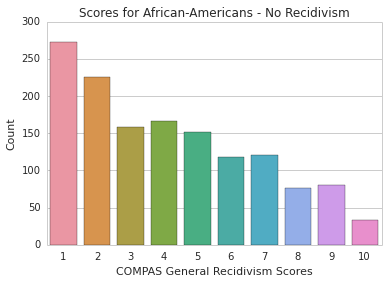

In [6]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - No Recidivism')
ax = sns.countplot(x='decile_score',data=aa_df[aa_df['is_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])
ax.set(xlabel='COMPAS General Recidivism Scores', ylabel='Count')

[<matplotlib.text.Text at 0x11b53f890>, <matplotlib.text.Text at 0x11dd79e50>]

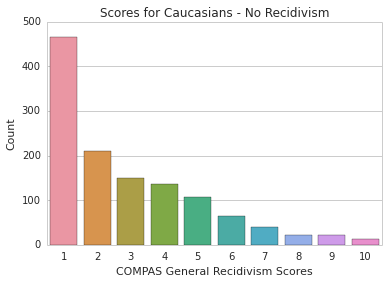

In [7]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - No Recidivism')
ax = sns.countplot(x='decile_score',data=c_df[c_df['is_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])
ax.set(xlabel='COMPAS General Recidivism Scores', ylabel='Count')

[<matplotlib.text.Text at 0x11e108410>, <matplotlib.text.Text at 0x11e22dad0>]

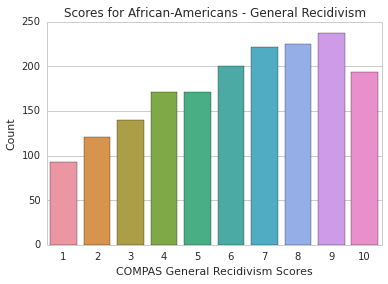

In [8]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - General Recidivism')
ax = sns.countplot(x='decile_score',data=aa_df[aa_df['is_recid'] == 1],order=[1,2,3,4,5,6,7,8,9,10])
ax.set(xlabel='COMPAS General Recidivism Scores', ylabel='Count')

[<matplotlib.text.Text at 0x11e1ab3d0>, <matplotlib.text.Text at 0x11e511a50>]

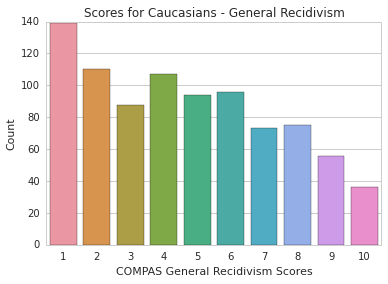

In [9]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - General Recidivism')
ax = sns.countplot(x='decile_score',data=c_df[c_df['is_recid'] == 1],order=[1,2,3,4,5,6,7,8,9,10])
ax.set(xlabel='COMPAS General Recidivism Scores', ylabel='Count')

In [116]:
print"African-Americans misclassified as recidivists =",'%.0f%%' % (float(adri.shape[0])/float(awdr.shape[0]) * 100)
print"Caucasians misclassified as recidivists =",'%.0f%%' % (float(cdri.shape[0])/float(cwdr.shape[0]) * 100)
print"African-Americans misclassified as non-recidivists =",'%.0f%%' % (float(ari.shape[0])/float(awr.shape[0]) * 100)
print"Caucasians misclassified as non-recidivists =",'%.0f%%' % (float(cri.shape[0])/float(cwr.shape[0]) * 100)

African-Americans misclassified as recidivists = 41%
Caucasians misclassified as recidivists = 22%
African-Americans misclassified as non-recidivists = 30%
Caucasians misclassified as non-recidivists = 51%


Methodology: 
In my first step of exploratory analysis, I separate both races and analyze the trends in scores for people who do or do not recidivate. Bar plots of these subsets show a trend that African-American defendants are usually given higher risk scores.

The article and original analysis analyze scores for both races as a whole. On the other hand, I decided to subset both races by whether or not the defendents recidivate. The article also includes a few examples of the risk assessment algorithm making mistakes that are biased towards African-Americans. Since a few side by side examples are not enough to prove any claims, 
this made me wonder if the questionnaire was biased or if the algorithm itself is just not very good. 
I also looked to see if there were examples of where African-American defendents were given a low risk score, but went on to recidivate, and Caucasian defendants who were given a Medium/High risk score, but did not recidivate. 
http://www.nbcmiami.com/news/local/Man-Strangled-Ex-Girlfriend-in-Pompano-Beach-Making-Her-Lose-Consciousness-Authorities-214996191.html
The statistics of the misclassifications are below, and I was also able to find a hearing video of a COMPAS scored African-American defendant who ended up committing a horrendous crime, even though he was rated a 1 out of 10 on the COMPAS scale. However, cherry picked examples do not provide as much insight as an overall analysis. 

I find that Black defendants were twice as likely to be misclassified as risky than white defendants. (41% vs. 22%) 
White defendants are 66% more likely to be misclassified as low risk than black defendants. (51% vs. 30%)
In regards to the model, I use gender, age, juvenile crime history, adult crime history, and current degree charge to see if we can predict recidivism status. 
Once my predictions have been done, I compare my predictions to the given COMPAS scores and actual recidivism status to see how my model performed. Any COMPAS score above 4 implies that the defendant will recidivate. 


In [ ]:
formula = 'is_recid ~ C(sex) +  age + juv_fel_count + juv_misd_count + juv_other_count + priors_count + C(c_charge_degree) - 1'
y, x = patsy.dmatrices(formula,data,return_type='dataframe')
x = (x - x.mean()) / x.std()

In [ ]:
lr = LogisticRegression()
Cs_lr = np.logspace(-5,1, 20)
  

search_parameters_lr = { 
   "penalty":             ['l1','l2'],   
   "C":                   Cs_lr, 
   "class_weight":        [None, "balanced"]
}

grid = GridSearchCV(lr, search_parameters_lr, cv = 4, verbose = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4,stratify=y)
grid.fit(x,np.ravel(y))
estimator = grid.best_estimator_
estimator.fit(x_train,y_train)
log_reg_predictions = estimator.predict(x_test)

In [50]:
print '\nClassification Report:\n', classification_report(y_test, compas_predictions)


Classification Report:
             precision    recall  f1-score   support

        0.0       0.66      0.71      0.69      1273
        1.0       0.67      0.61      0.64      1196

avg / total       0.67      0.67      0.66      2469



In [47]:
print '\nClassification report:\n', classification_report(y_test, log_reg_predictions) 


Classification report:
             precision    recall  f1-score   support

        0.0       0.67      0.78      0.72      1273
        1.0       0.72      0.59      0.65      1196

avg / total       0.69      0.69      0.69      2469



In [48]:
print '\nConfusion Matrix:\n', confusion_matrix(y_test, compas_predictions) 


Confusion Matrix:
[[909 364]
 [463 733]]


In [49]:
print '\nConfusion Matrix:\n', confusion_matrix(y_test, log_reg_predictions)


Confusion Matrix:
[[993 280]
 [489 707]]


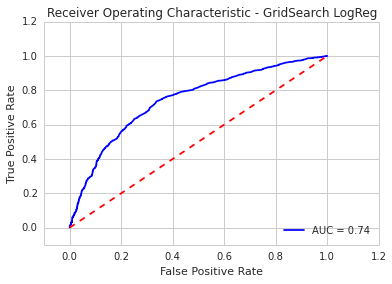

In [54]:
pred_p = estimator.predict_proba(x_test)[:,1].ravel()
from sklearn.metrics import roc_curve, auc


false_p_rate, true_p_rate, thresholds = roc_curve(y_test, pred_p)
roc_auc = auc(false_p_rate, true_p_rate)

plt.title('Receiver Operating Characteristic - GridSearch LogReg')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()